In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [310]:
company=pd.read_csv('/content/Company_Data (1).csv')

In [311]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [312]:
company.shape

(400, 11)

In [313]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [314]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [315]:
company[company.duplicated]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


<Axes: ylabel='Count'>

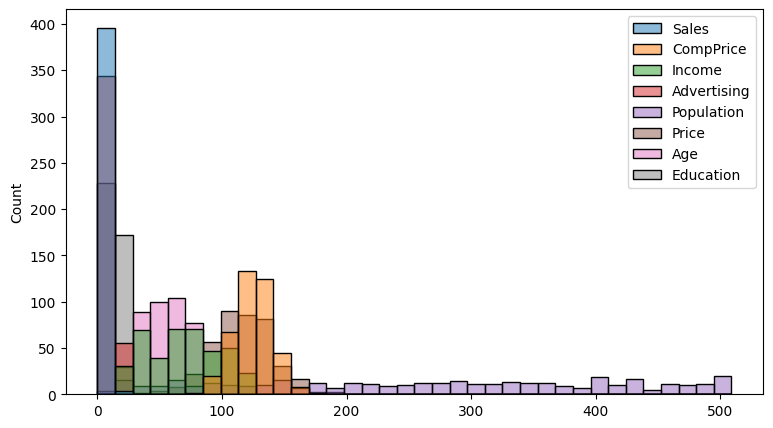

In [316]:
sns.histplot(company)

<Axes: xlabel='Sales', ylabel='Density'>

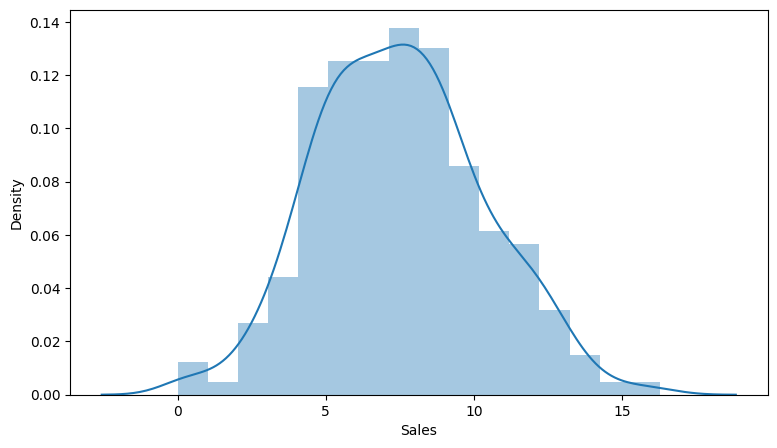

In [317]:
sns.distplot(company['Sales'])

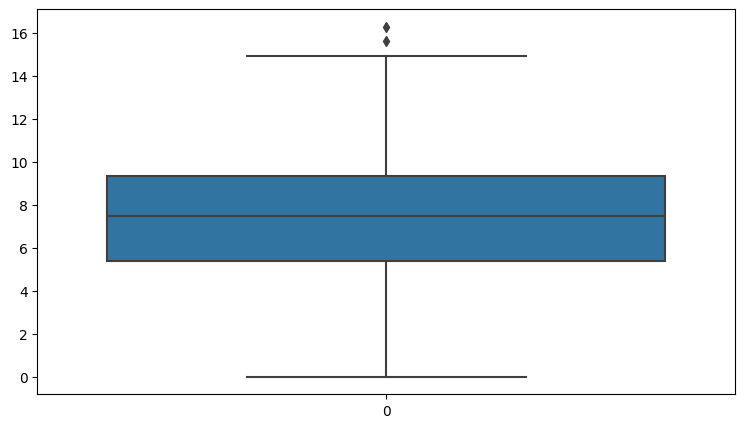

In [318]:
ax = sns.boxplot(company['Sales'])

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


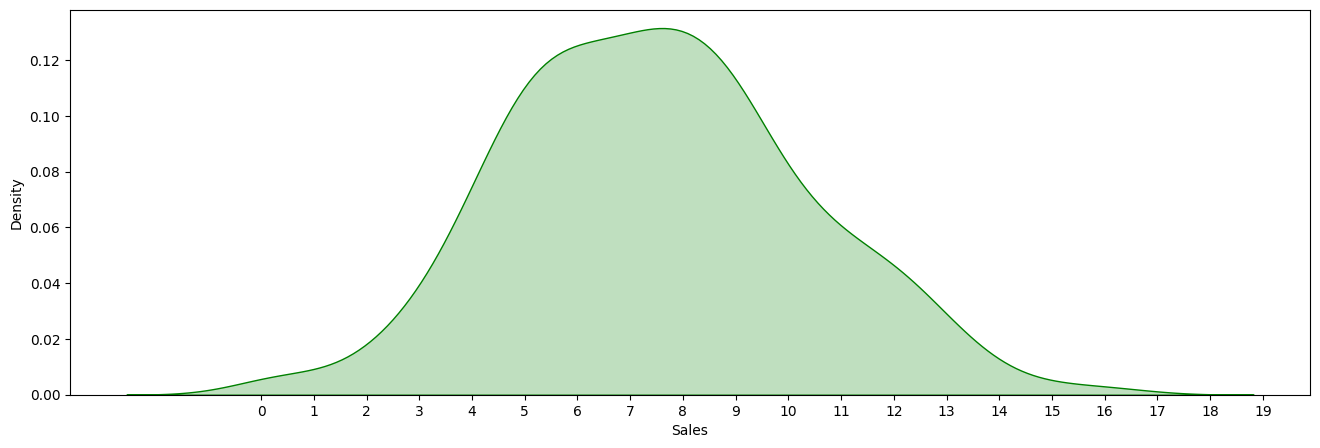

In [319]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(company['Sales'].skew()))
print("Kurtosis: {}".format(company['Sales'].kurtosis()))
ax = sns.kdeplot(company['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

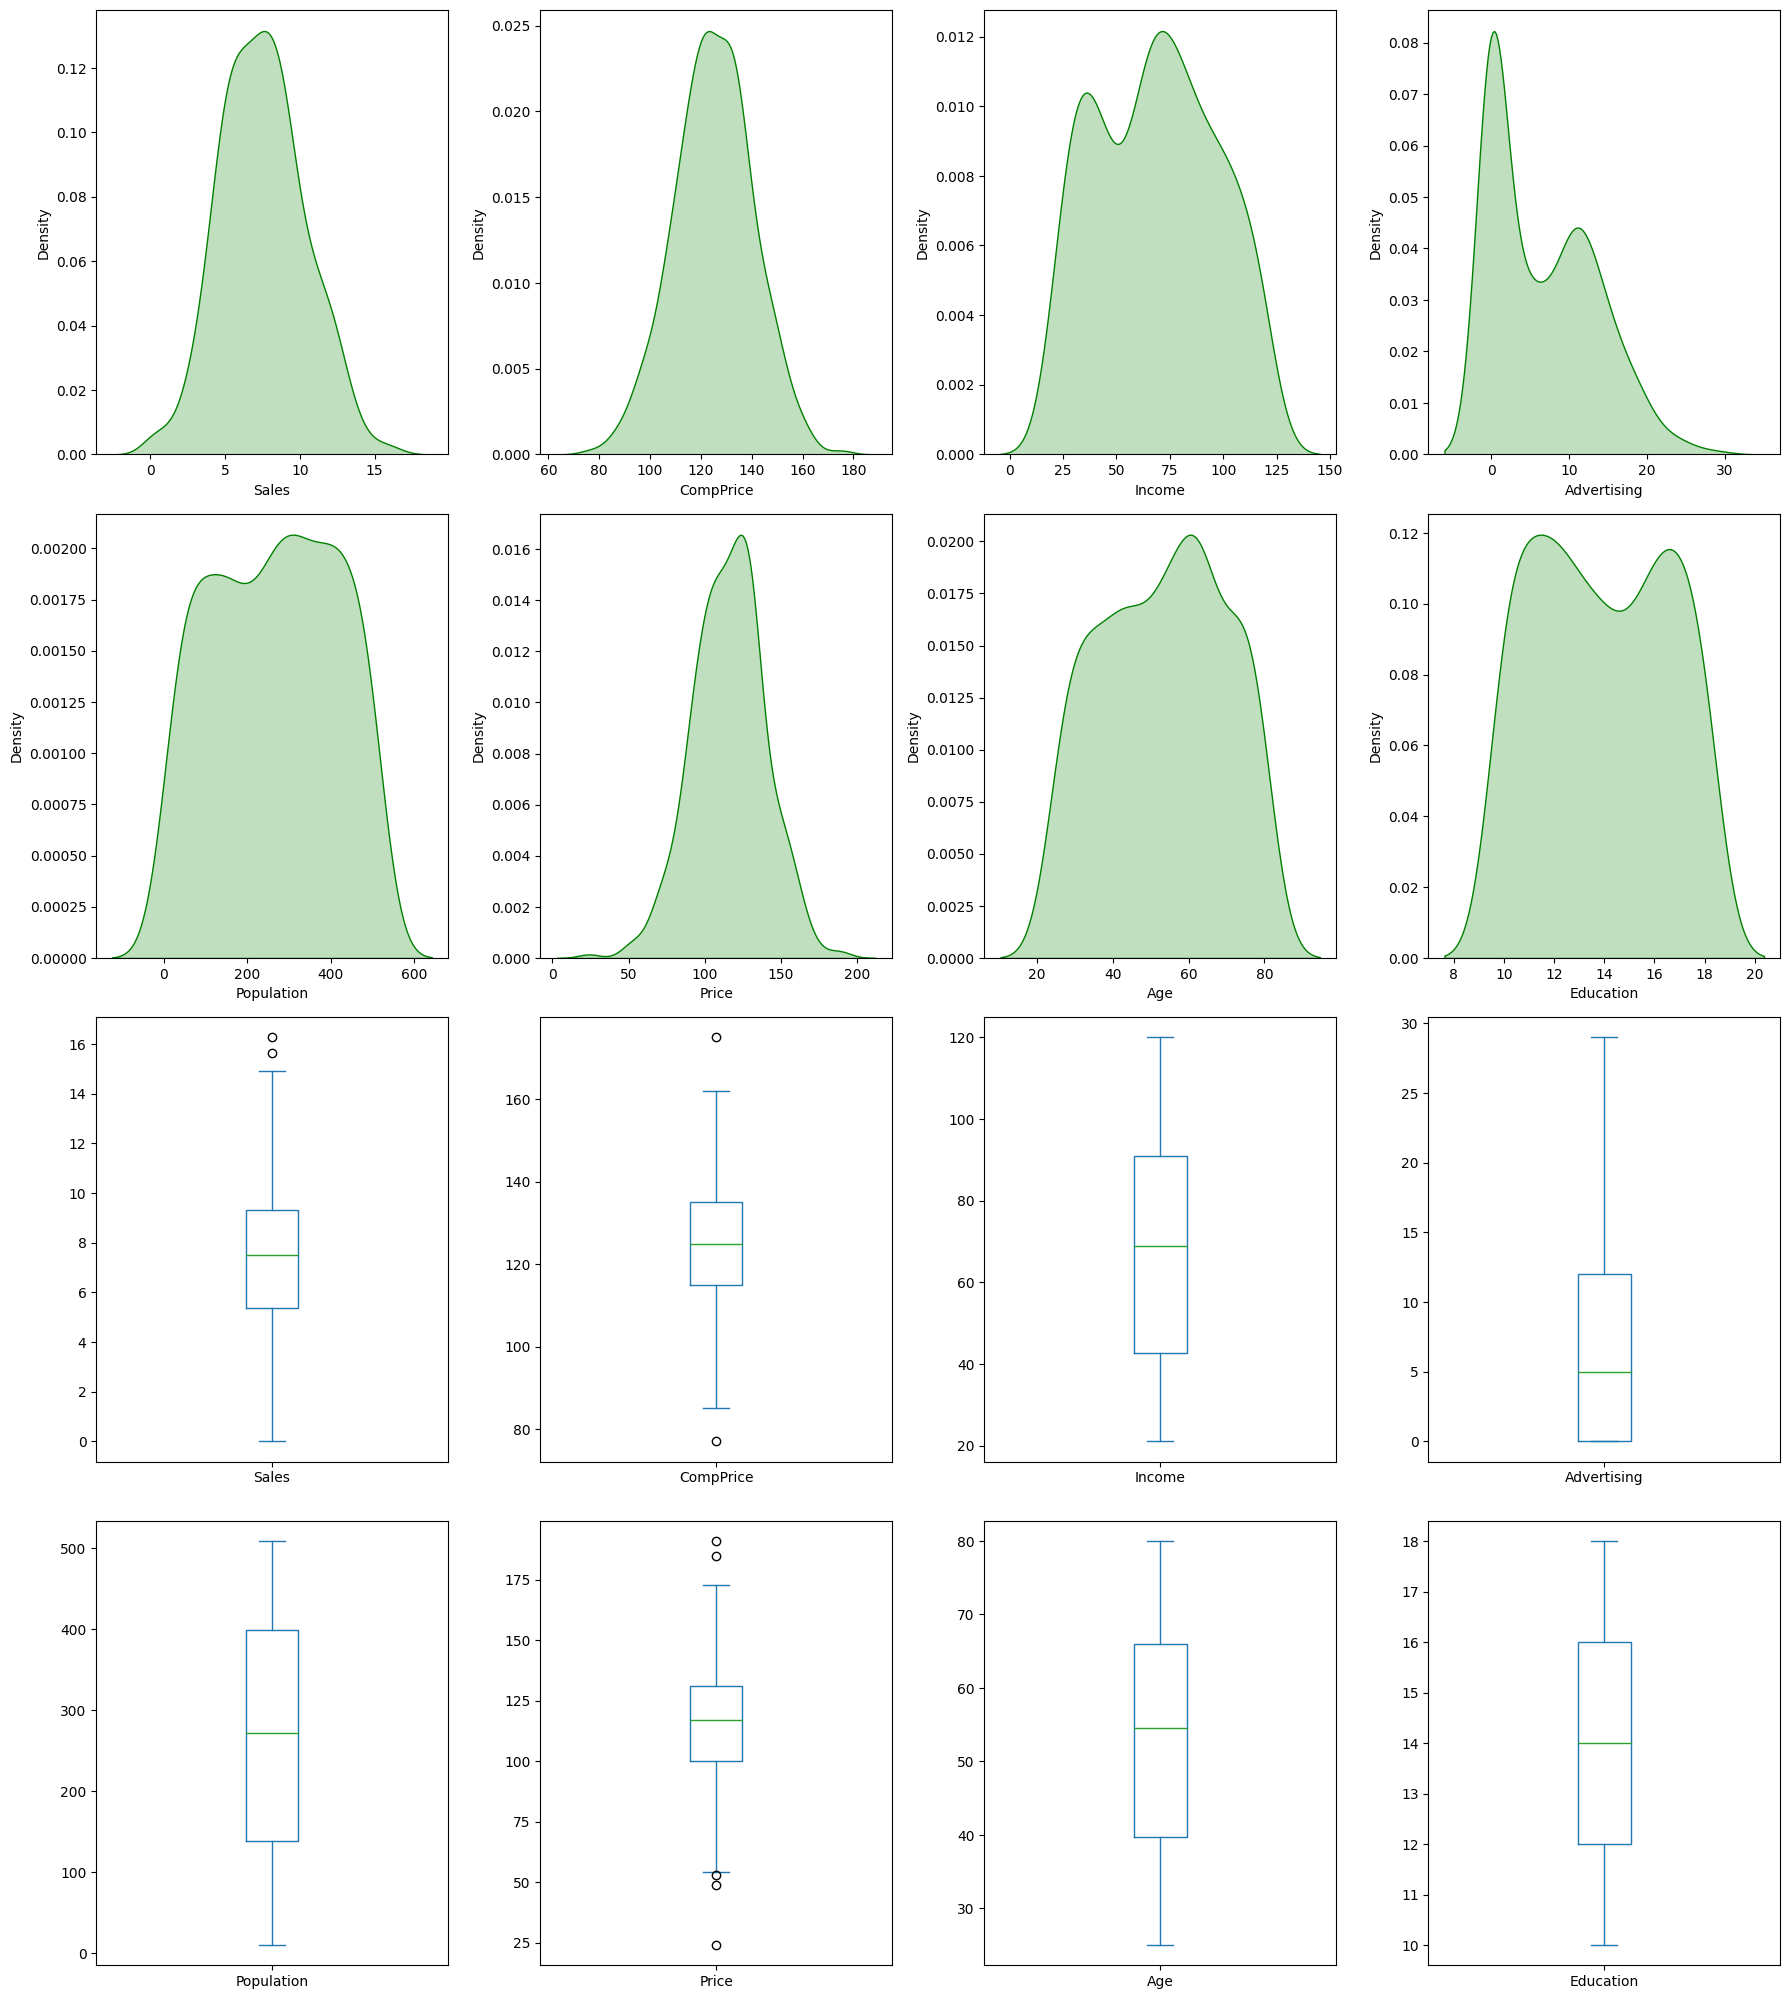

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [320]:
num_columns = company.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(company[col],color='g',shade=True)
    plt.subplot(8,4,i+8)
    company[col].plot.box()
plt.tight_layout()
plt.show()
num_data = company[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [321]:
corr=company.corr()
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<Axes: >

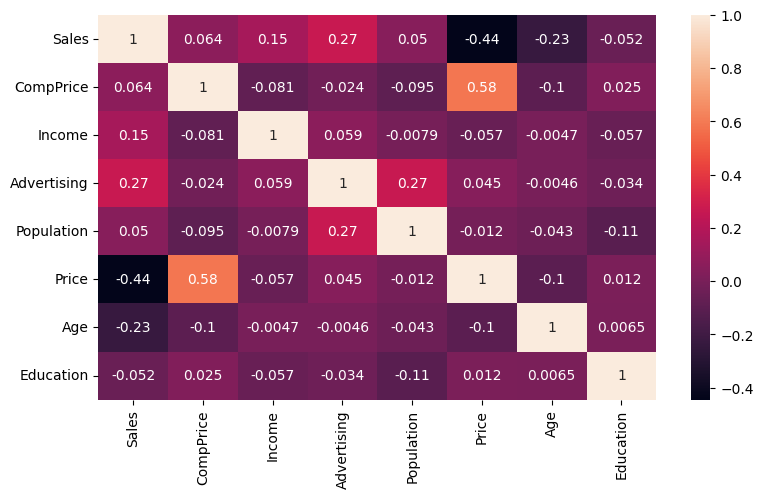

In [322]:
sns.heatmap(corr,annot=True)

In [323]:
#Create numerical variables for all categorical data, with label encoding
label_encoder=preprocessing.LabelEncoder()
company["ShelveLoc"]=label_encoder.fit_transform(company["ShelveLoc"])
company["Urban"]=label_encoder.fit_transform(company["Urban"])
company["US"]=label_encoder.fit_transform(company["US"])

In [324]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


3 - Random Forest Model
Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [325]:
company["sales"]="small"
company.loc[company["Sales"]>7.49,"sales"]="large"
company.drop(["Sales"],axis=1,inplace=True)

In [326]:
company

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,large
1,111,48,16,260,83,1,65,10,1,1,large
2,113,35,10,269,80,2,59,12,1,1,large
3,117,100,4,466,97,2,55,14,1,1,small
4,141,64,3,340,128,0,38,13,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,large
396,139,23,3,37,120,2,55,11,0,1,small
397,162,26,12,368,159,2,40,18,1,1,small
398,100,79,7,284,95,0,50,12,1,1,small


In [327]:
x=company.iloc[:,0:9]
x


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,138,73,11,276,120,0,42,17,1
1,111,48,16,260,83,1,65,10,1
2,113,35,10,269,80,2,59,12,1
3,117,100,4,466,97,2,55,14,1
4,141,64,3,340,128,0,38,13,1
...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1
396,139,23,3,37,120,2,55,11,0
397,162,26,12,368,159,2,40,18,1
398,100,79,7,284,95,0,50,12,1


In [328]:
y=company.iloc[:,-1]
y

0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: sales, Length: 400, dtype: object

In [329]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [330]:
y_train.value_counts()

small    162
large    158
Name: sales, dtype: int64

In [331]:
from sklearn.ensemble import RandomForestClassifier as RF
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy')
model.fit(x_train,y_train)
model.oob_score_

0.7875

In [332]:
pred_train = model.predict(x_train)
pred_test=model.predict(x_test)

In [333]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [334]:
accuracy_score(y_train,pred_train)

1.0

In [335]:
accuracy_score(y_test,pred_test)

0.8875

In [336]:
confusion_matrix(y_train,pred_train)

array([[158,   0],
       [  0, 162]])

In [337]:
confusion_matrix(y_test,pred_test)

array([[35,  6],
       [ 3, 36]])

In [338]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df_t

,Actual,Predicted
282,large,large
391,small,large
5,large,large
198,small,small
387,large,large
...,...,...
190,large,large
34,small,small
350,large,large
251,small,small


In [354]:
model.score(x_test,y_test)

0.8875

In [355]:
#Identifying the important features that contribute to the output and sorting it in ascending order
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

Price          0.257422
CompPrice      0.142845
Age            0.119316
Income         0.109991
Advertising    0.101949
Population     0.096621
ShelveLoc      0.096147
Education      0.058133
Urban          0.017575
dtype: float64

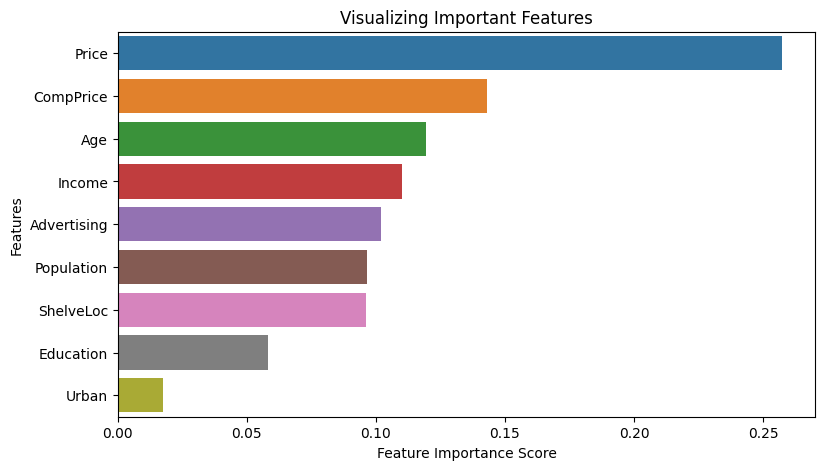

In [356]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [358]:
from sklearn.ensemble import RandomForestClassifier
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=110, max_features=5)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [359]:
data = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.8625
1,2,1.0,0.8625
2,3,1.0,0.8500
3,4,1.0,0.8375
4,5,1.0,0.8125
5,6,1.0,0.8375
6,7,1.0,0.8125
7,8,1.0,0.8375
8,9,1.0,0.8375


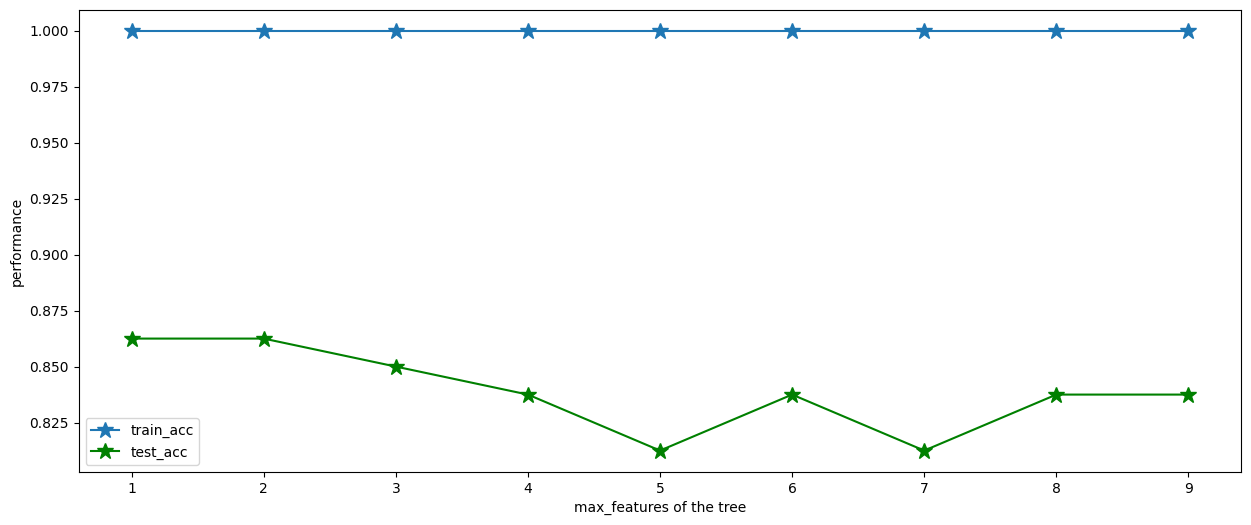

In [360]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = '*',markersize=12)
plt.plot(data['max_features'], data['test_acc'], marker = '*',markersize=12,color='green')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()